In [1]:
#Importamos las bibliotecas a utilizar
import numpy as np
from pulp import LpProblem, LpVariable, LpMinimize, value
from typing import List, Optional, Callable
import matplotlib.pyplot as plt
#Comenzamos la clase
class ClasificadorLineal:
    def __init__(self):
        """
        Constructor

        Construye el objeto Clasificador lineal una vez se generá una instancia de el

        """
        self.H = np.array([]) #Representa el primer conjunto
        self.M = np.array([]) #Representa el segundo conjunto
        self.problema = LpProblem("Problema_de_Programacion_Lineal", LpMinimize) #Representa el PL a solucionar
        #A continuación se encuentran las variables del PL a solucionar:
        self.yi = [] 
        self.zi = []
        self.a1 = LpVariable("a_1")
        self.a2 = LpVariable("a_2")
        self.b = LpVariable("b")
    def entrenar(self, H: np.ndarray, M: np.ndarray) -> None:
        """
        Método entrenar     
        Dado un conjunto de clases resuelve el PL respectivo para obtener la recta de decisión
        Argumentos:
        H - Primer conjunto a considerar contenido en R^2 representado como arreglo de numpy
        M - Segundo conjunto a considerar contenido en R^2 representado como arreglo de numpy
        
        """
        self.H = H #Guardamos ambos conjuntos en los atributos de la clase
        self.M = M
        #Ahora construimos las restricciones respectivas para cada pundo del conjunto H
        for i in range(len(H)): 
            self.yi.append(LpVariable("y_" + str(i), lowBound=0))
        #Hacemos lo mismo para los elementos del conjunto M
        for i in range(len(M)):
            self.zi.append(LpVariable("z_" + str(i), lowBound=0))
        #Escribimos la función objetivo y la agregamos al objeto problema
        self.problema += (1 / len(H)) * sum(self.yi) + (1 / len(M)) * sum(self.zi)
        #Escribimos las restricciones de los puntos del conjunto H y las guardamos en el objeto problema
        for i in range(len(H)):
            self.problema += 0 >= -(self.a1 * H[i][0] + self.a2 * H[i][1]) + self.b + 1 - self.yi[i]
        #Repetimos el proceso para el otro conjunto según el PL que requerimos para R^2
        for i in range(len(M)):
            self.problema += 0 >= (self.a1 * M[i][0] + self.a2 * M[i][1]) - self.b + 1 - self.zi[i]
        self.problema.solve()
    def obtener_frontera_decision(self) -> Optional[Callable[[np.ndarray], np.ndarray]]:
        """
        Método obtener frontera de decisión
        No recibe argumentos mas que la propia clase y regresa (opcionalmente) una función lambda que representa la recta
        de decisión del clasificador.
        """
        if value(self.a2) != 0: #Verificamos que podamos escribir la recta en la forma y=mx+b
            pendiente = -1 * (value(self.a1) / value(self.a2)) #Construimos la recta
            interseccion = value(self.b)
            return lambda x: pendiente * x + interseccion #Regresamos la función lambda
        else:
            return None #En caso de no poder construirse regresamos None
    def graficar_clasificador(self, x_min: float, x_max: float) -> None:
        """ 
        Método graficador 
        Se encarga de graficar la recta de decisión junto con los puntos de ambos conjuntos
        """
        intervalo = np.linspace(x_min, x_max)
        frontera_decision = self.obtener_frontera_decision()
        plt.scatter(*zip(*self.H), c='#1f77b4', label='Conjunto H')
        plt.scatter(*zip(*self.M), c='#e377c2', label='Conjunto M')
        if frontera_decision:
            plt.plot(intervalo, frontera_decision(intervalo), label='Frontera de Decisión',color='r')
        plt.grid()
        plt.legend()
        plt.show()
    def predecir(self, conjunto: np.ndarray) -> List[int]:
        """   
        Método predecir
        Dado un conjunto de datos regresa una lista de la clase en la que cree el algoritmo que se encuentra
        el n-ésimo dato.
        """
        clases = []
        for dato in conjunto:
            if value(self.a1) * dato[0] + value(self.a2) * dato[1] + value(self.b) > 0:
                clases.append("H")
            else:
                clases.append("M")
        return clases

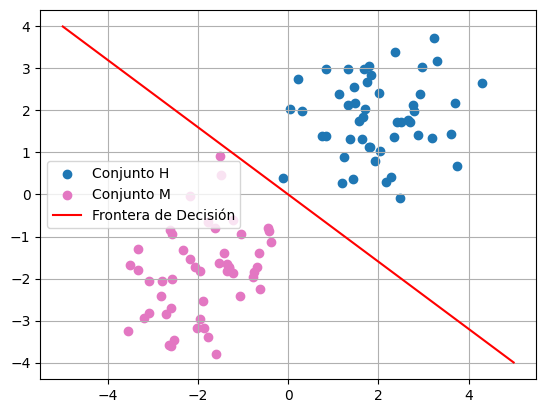

In [2]:
#Elegimos una semilla para poder replicar los resultados
np.random.seed(89)
cov = [[1, 0], [0, 1]]#Elegimos la identidad como matriz de covarianzas
# Elegimos las medias de cada entrada para ambos conjuntos
medias_conjunto_H = [2, 2]
medias_conjunto_M = [-2, -2]
#Generamos muestras aleatorias con la distribución normal multivariable
conjunto_H = np.random.multivariate_normal(medias_conjunto_H,cov, 100)
conjunto_M = np.random.multivariate_normal(medias_conjunto_M,cov, 100)
clasificador=ClasificadorLineal()
#Entrenamos el algoritmo con la mitad de los datos
clasificador.entrenar(conjunto_H[0:50],conjunto_M[0:50])
clasificador.graficar_clasificador(-5,5)

In [3]:
prediccion_resto_h=clasificador.predecir(conjunto_H[50:-1])
erroneos=0
for i in prediccion_resto_h:
    if i=="M":
        erroneos+=1
print("El algoritmo tuvo una precisión de ", (50-erroneos)/50*100,"%")

El algoritmo tuvo una precisión de  98.0 %


In [4]:
prediccion_resto_m=clasificador.predecir(conjunto_M[50:-1])
erroneos=0
for i in prediccion_resto_m:
    if i=="H":
        erroneos+=1
print("El algoritmo tuvo una precisión de ", (50-erroneos)/50*100,"%")

El algoritmo tuvo una precisión de  100.0 %


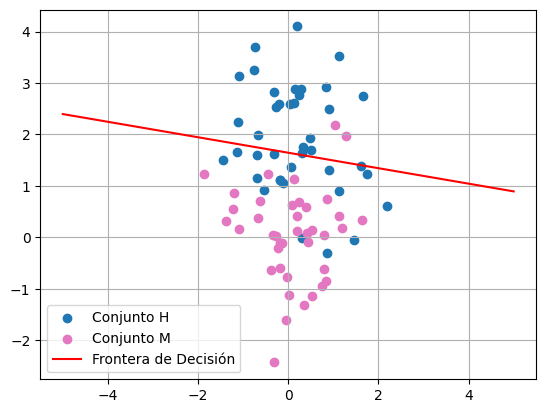

In [5]:
#Elegimos una semilla para poder replicar los resultados
np.random.seed(1)
cov = [[1, 0], [0, 1]]#Elegimos la identidad como matriz de covarianzas
# Elegimos las medias de cada entrada para ambos conjuntos
medias_conjunto_H = [0, 2]
medias_conjunto_M = [0, 0]
#Generamos muestras aleatorias con la distribución normal multivariable
conjunto_H_2 = np.random.multivariate_normal(medias_conjunto_H,cov, 40)
conjunto_M_2 = np.random.multivariate_normal(medias_conjunto_M,cov, 40)
clasificador_2=ClasificadorLineal()
#Entrenamos el algoritmo con la mitad de los datos
clasificador_2.entrenar(conjunto_H_2,conjunto_M_2)
clasificador_2.graficar_clasificador(-5,5)